In [1]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

2022-11-04 12:30:17.758226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load data (must be in same folder as this file, which it will be if you simply unzip the assignment).
# Note that we don't have any y_test! This way you cannot "cheat"!

x_train = np.load('../Common/data/X_train.npy')
x_test = np.load('../Common/data/X_test.npy')
y_train = np.load('../Common/data/y_train.npy')

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape, x_test.shape, y_train.shape)

(40000, 84) (10000, 84) (40000,)


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(84,)),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
    ])

model.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=['mae'],
    )

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1000/1000 [==============================] - 4s 3ms/step - loss: 0.1287 - mae: 0.2348 - val_loss: 0.0406 - val_mae: 0.1583
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0345 - mae: 0.1415 - val_loss: 0.0373 - val_mae: 0.1407
Epoch 3/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0279 - mae: 0.1255 - val_loss: 0.0247 - val_mae: 0.1146
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0247 - mae: 0.1160 - val_loss: 0.0260 - val_mae: 0.1285
Epoch 5/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0225 - mae: 0.1094 - val_loss: 0.0223 - val_mae: 0.1108
Epoch 6/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0211 - mae: 0.1043 - val_loss: 0.0246 - val_mae: 0.1263
Epoch 7/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0198 - mae: 0.0995 - val_loss: 0.0216 - val_mae: 0.1105
Epoch 8/50
1000/1000 [==============================] - 2s 2ms

In [21]:
import matplotlib.pyplot as plt
def plot_hist(history):
    acc = history.history['mae']
    val_acc = history.history['mae']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    figure, axis = plt.subplots(2, 1)

    axis[0].plot(epochs, acc, label = 'Training msqe')
    axis[0].plot(epochs, val_acc, label = 'Validation msqe')
    axis[0].set_title('Training and validation mean squared error')
    axis[0].legend(loc = "lower right")

    axis[1].plot(epochs, loss, label = 'Training loss')
    axis[1].plot(epochs, val_loss, label = 'Training loss')
    axis[1].set_title('Training and validation loss')
    axis[1].legend(loc = "upper right")

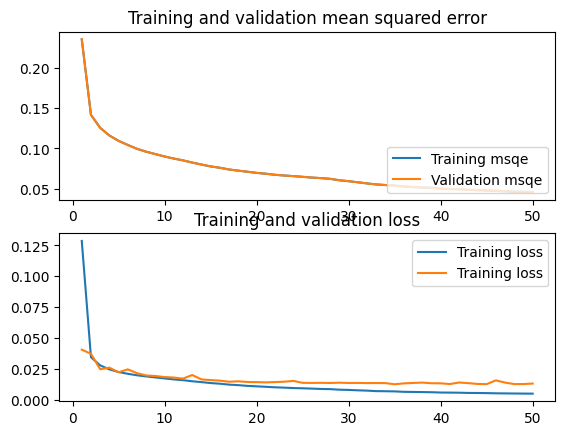

In [22]:
plot_hist(history)

In [23]:
import pandas as pd
y_test_hat = model.predict(x_test)
y_test_hat_pd = pd.DataFrame({
    'Id': list(range(10000)),
    'Predicted': y_test_hat.reshape(-1),
})

313/313 [==============================] - 1s 3ms/step


In [ ]:
assert isinstance(y_test_hat_pd, pd.DataFrame)
assert all(y_test_hat_pd.columns == ['Id', 'Predicted'])
assert len(y_test_hat_pd) == 10000

# If you pass the checks, the file is saved.
y_test_hat_pd.to_csv('y_test_hat.csv', index=False)